# 0. Setup

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import colorcet as cc
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.colors import ListedColormap
from matplotlib import cm

# Setup custom fonts
import matplotlib.font_manager as fm
fm.fontManager.addfont('files/fonts/ITC-Officina-Sans-Std-Book-Font.ttf')
fm.fontManager.addfont('files/fonts/thsarabunnew-webfont.ttf')
plt.rc('font', family='TH Sarabun New')


In [2]:
# define continouos palettes for parties
def get_continuous_palette(N, rgb_set, name):
  base = np.ones((N, 4))
  base[:, 0] = np.linspace(rgb_set[0]/N, 1, N) # R = 0, 192, 243, 109 
  base[:, 1] = np.linspace(rgb_set[1]/N, 1, N) # G = 34, 0, 219, 0
  base[:, 2] = np.linspace(rgb_set[2]/N, 1, N)  # B = 205, 0, 0, 192
  palette = mcolors.ListedColormap(base[::-1], name=name)

  return palette

# define function for asymmetric divering palettes
def get_asymmetric_palette(s):
  N = 256
  max_val = np.max(s)
  min_val = np.min(s)
  max_abs_val = np.max([np.abs(max_val), np.abs(min_val)])

  if np.abs(max_val) > np.abs(min_val):

    perc = np.abs(min_val) / np.abs(max_val)
    index = N - int(N * perc)
    top = cm.get_cmap('Reds_r', 128)
    space = top(np.linspace(0, 1, N))
    # slice the array to account for asymmetry
    reduced = space[index:,:]
    reduced_palette = np.ones((N, 4))
    reduced_palette[:, 0] = np.linspace(reduced[0,0], 1, N)
    reduced_palette[:, 1] = np.linspace(reduced[0,1], 1, N)
    reduced_palette[:, 2] = np.linspace(reduced[0,2], 1, N)
    bottom = cm.get_cmap('Blues', 128)
    newcolors = np.vstack((reduced_palette, bottom(np.linspace(0, 1, len(reduced_palette)))))
    reduced_palette = mcolors.ListedColormap(newcolors, name='reduced_palette')

  else: 
    perc = np.abs(max_val) / np.abs(min_val)
    index = int(N * perc)
    bottom = cm.get_cmap('Blues', 128)
    space = bottom(np.linspace(0, 1, N))
    # slice the array to account for asymmetry
    reduced = space[:index,:]
    reduced_palette = np.ones((N, 4))
    reduced_palette[:, 0] = np.linspace(1, reduced[-1,0], N)
    reduced_palette[:, 1] = np.linspace(1, reduced[-1,1], N)
    reduced_palette[:, 2] = np.linspace(1, reduced[-1,2], N)
    top = cm.get_cmap('Reds_r', 128)
    newcolors = np.vstack((top(np.linspace(0, 1, len(reduced_palette))), reduced_palette))
    reduced_palette = ListedColormap(newcolors, name='reduced_palette')

  return reduced_palette


# 1. Import Data

In [3]:
# Import processed data
df = gpd.read_file("data/processed/final_lucca_camera.shp")
# Get coordinates for plotting municipality ids
df['coords'] = df['geometry'].apply(lambda x: x.representative_point().coords[:])
df['coords'] = [coords[0] for coords in df['coords']]


# 2. Analysis

## Map of Municipalities

Text(0.35, 0.17, 'Dati ISTAT (2022)\n@pellegrinettom')

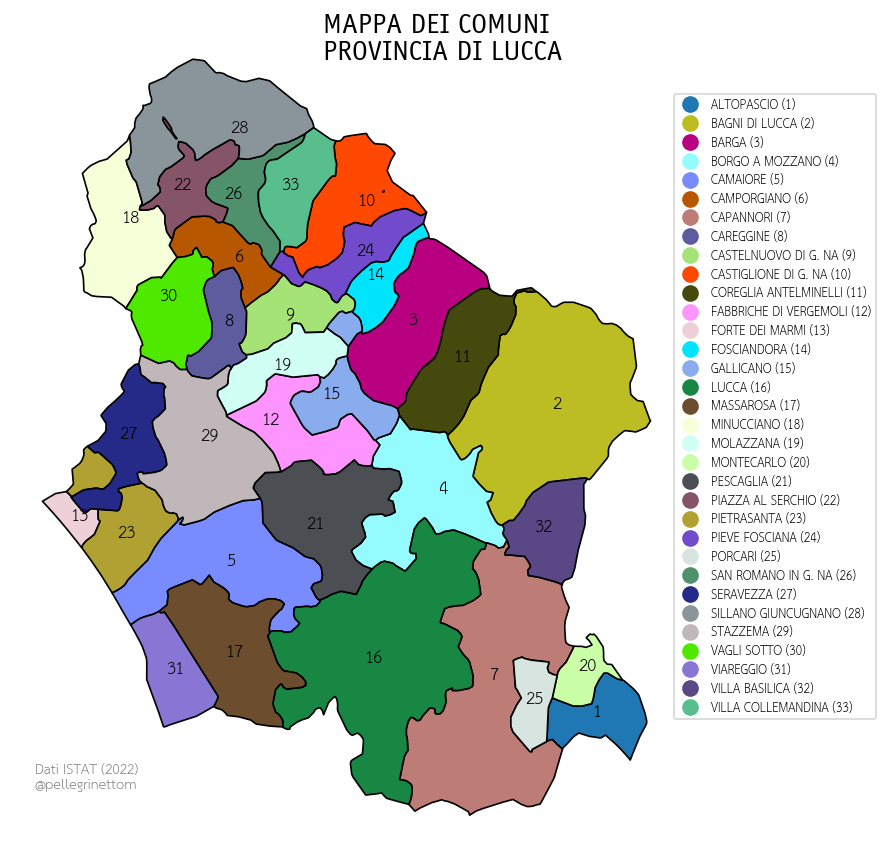

In [4]:
# MUNICIPIALITIES MAP
fig, ax = plt.subplots(1, figsize=(16,9), dpi=1920/16)
df.plot('id_name', ax=ax, edgecolor="black", cmap=cc.cm.glasbey_category10, categorical=True, legend = True, legend_kwds={'bbox_to_anchor': (1.30, 0.92), 'fontsize': 7}).set_axis_off()
for idx, row in df.iterrows():
    plt.annotate(text=row['id'], xy=row['coords'],
                 horizontalalignment='center')
plt.figtext(0.50,.87,'MAPPA DEI COMUNI', fontname='ITC Officina Sans Std', fontsize=17, ha='left')
plt.figtext(0.50,.845,'PROVINCIA DI LUCCA', fontname='ITC Officina Sans Std', fontsize=17, ha='left')
plt.figtext(0.35,.17,"Dati ISTAT (2022)\n@pellegrinettom",fontsize=8, ha='left', color='gray')

## Turnover by Municipality

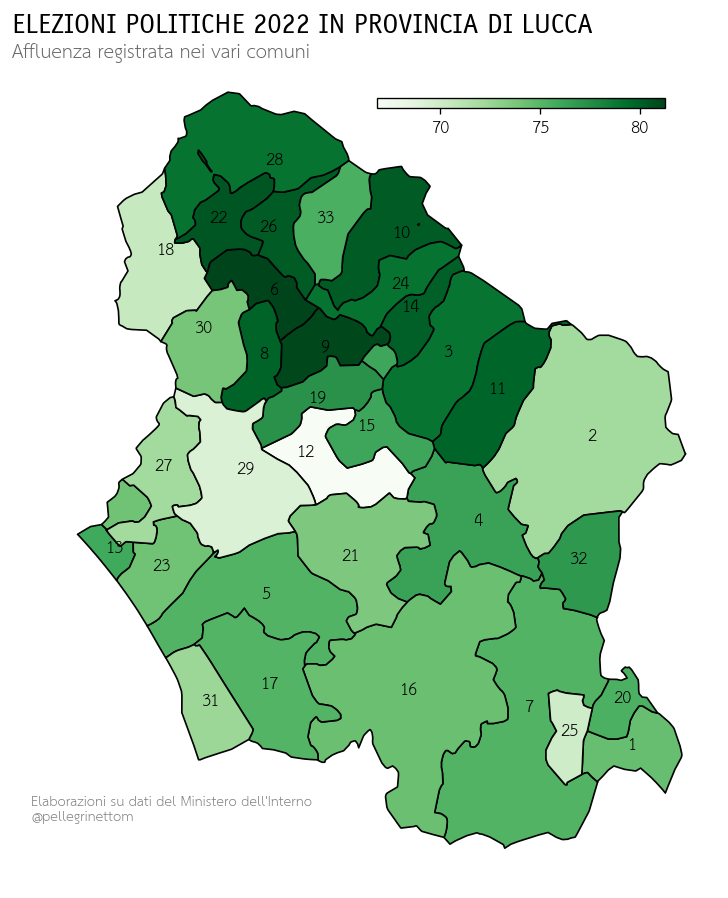

In [5]:
palette = 'Greens'
fig, ax = plt.subplots(1, figsize=(16,9), dpi=1920/16)
df.plot('%h23_prec', ax=ax, cmap = palette, edgecolor="black", legend = False).set_axis_off()
for idx, row in df.iterrows():
    plt.annotate(text=row['id'], xy=row['coords'],
                horizontalalignment='center')

leg = ax.get_legend()
plt.figtext(0.32,.9,'ELEZIONI POLITICHE 2022 IN PROVINCIA DI LUCCA', fontname = 'ITC Officina Sans Std', fontsize=17, ha='left')
plt.figtext(0.32,.877,'Affluenza registrata nei vari comuni', fontsize=11, ha='left', color='dimgray')
plt.figtext(0.33,.17,"Elaborazioni su dati del Ministero dell'Interno\n@pellegrinettom",fontsize=8, ha='left', color='grey')
vmax = np.nanmax(df['%h23_prec'].values)
vmin = np.nanmin(df['%h23_prec'].values)
cax = fig.add_axes([0.51, 0.83, 0.15, 0.01])
sm = plt.cm.ScalarMappable(cmap=palette, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbr = fig.colorbar(sm, cax=cax, orientation='horizontal')
cbr.ax.tick_params(labelsize=10) 

## Winning Coalition by Municipality

Text(0.33, 0.17, "Elaborazioni su Dati del Ministero dell'Interno\n@pellegrinettom")

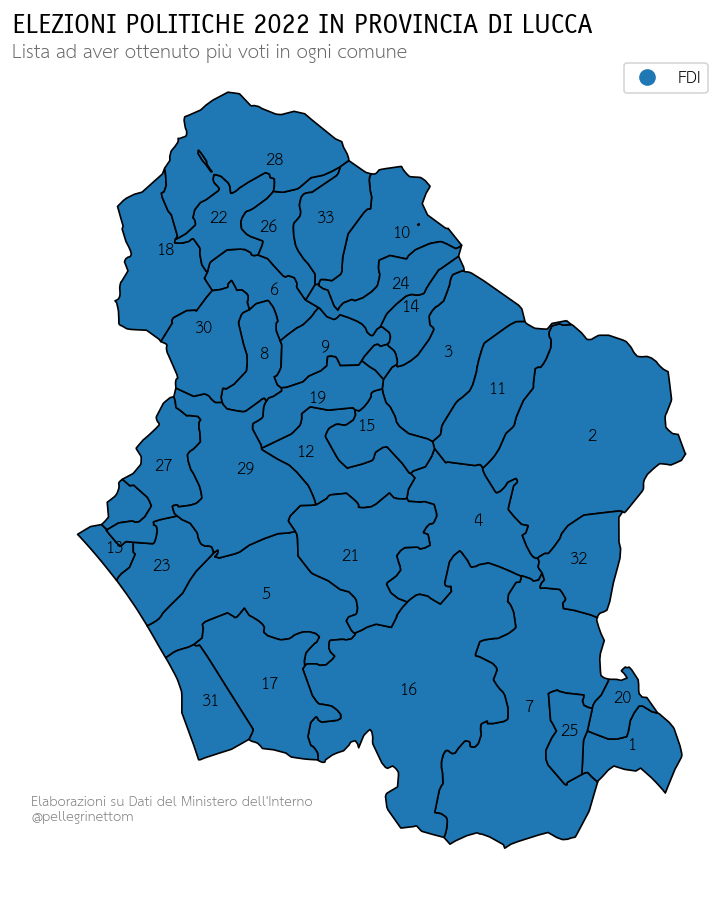

In [6]:
fig, ax = plt.subplots(1, figsize=(16,9), dpi=1920/16)
df.plot('desc_lis', ax=ax, edgecolor="black", legend =True).set_axis_off()
for idx, row in df.iterrows():
    plt.annotate(text=row['id'], xy=row['coords'],
                horizontalalignment='center')

leg = ax.get_legend()
plt.figtext(0.32,.9,'ELEZIONI POLITICHE 2022 IN PROVINCIA DI LUCCA', fontname = 'ITC Officina Sans Std', fontsize=17, ha='left')
plt.figtext(0.32,.877,'Lista ad aver ottenuto più voti in ogni comune',fontsize=11, ha='left', color='dimgray')
plt.figtext(0.33,.17,"Elaborazioni su Dati del Ministero dell'Interno\n@pellegrinettom",fontsize=8, ha='left', color='grey')

## Coalitions Share by Municipality

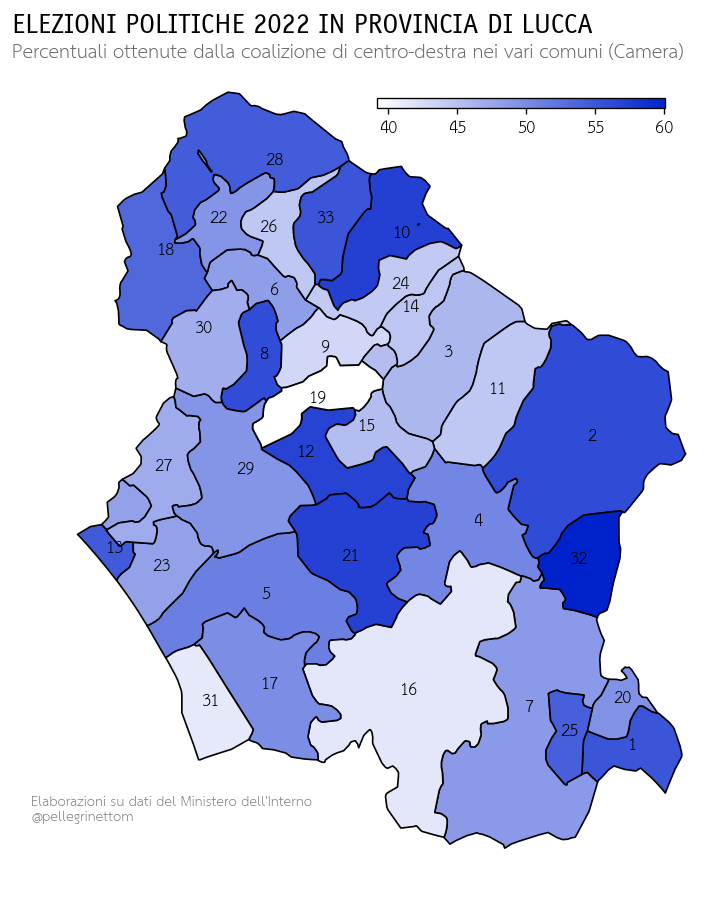

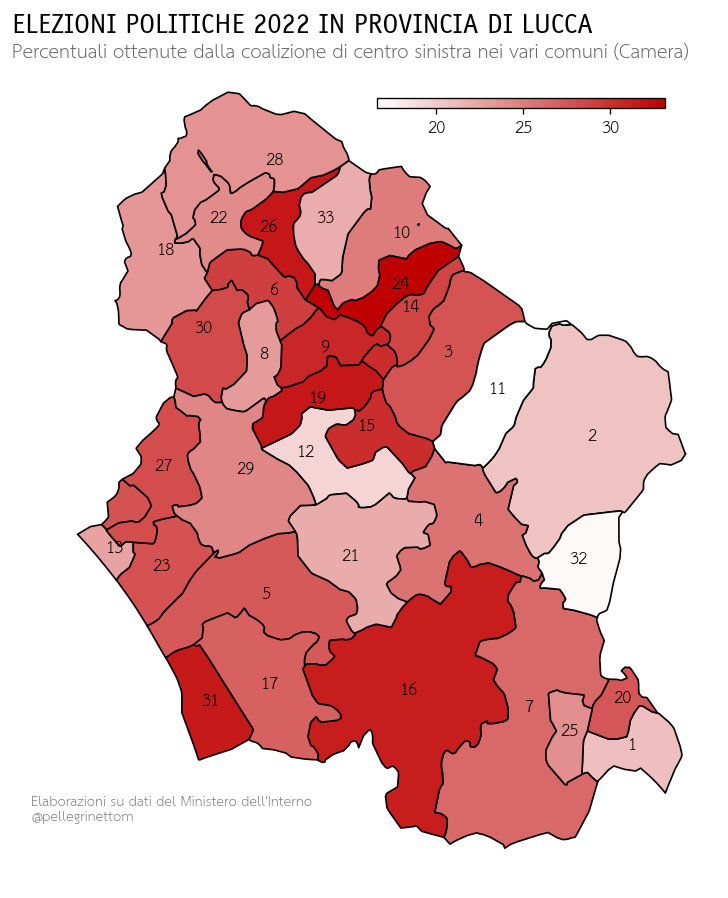

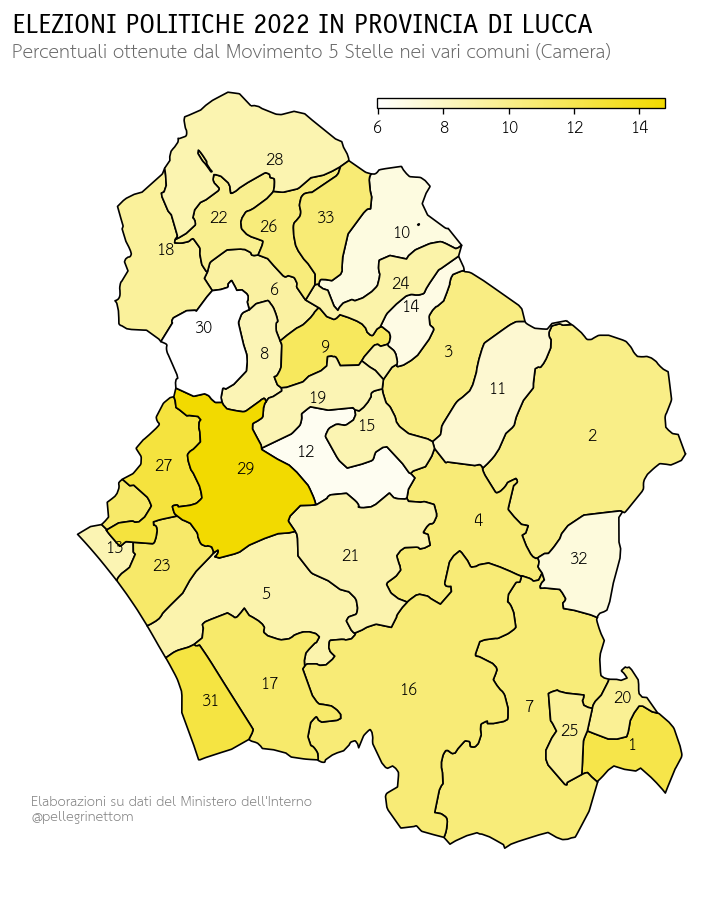

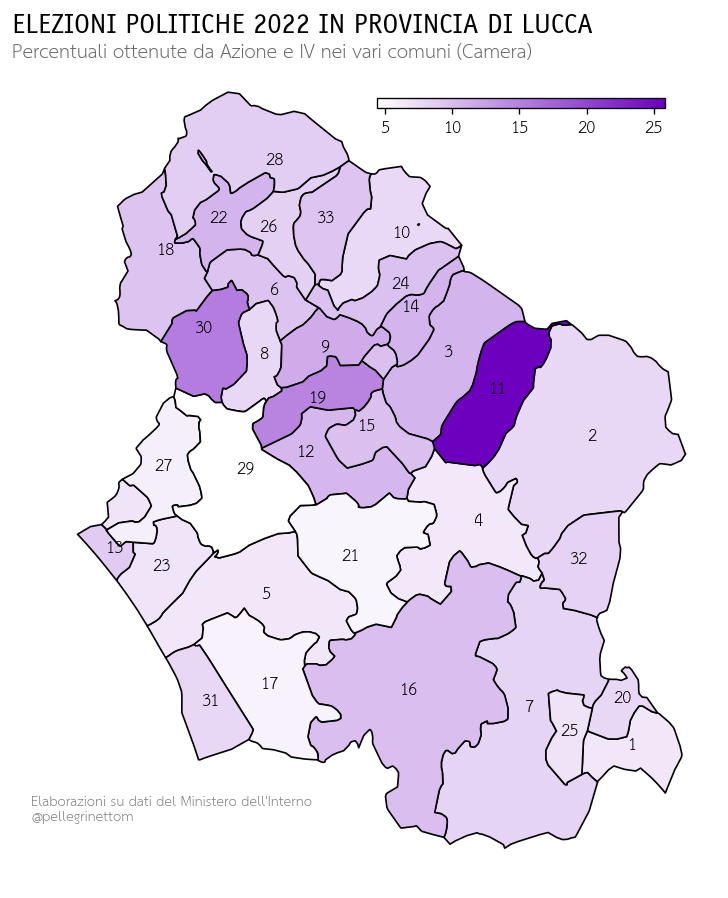

In [7]:
coalizioni = ['CDX', 'CSX', 'M5S', 'AZIV']
rgb_sets = [(0, 34, 205), (192,0,0), (243,219,0), (109,0,192)]
titles = ['dalla coalizione di centro-destra', 'dalla coalizione di centro sinistra', 'dal Movimento 5 Stelle', 'da Azione e IV']

for coalizione, rgb_set, title in zip(coalizioni,rgb_sets, titles):

  palette = get_continuous_palette(256, rgb_set, coalizione)
  fig, ax = plt.subplots(1, figsize=(16,9), dpi=1920/16)
  df.plot(coalizione, ax=ax, cmap = palette, edgecolor="black", legend = False).set_axis_off()
  for idx, row in df.iterrows():
     plt.annotate(text=row['id'], xy=row['coords'],
                  horizontalalignment='center')

  leg = ax.get_legend()
  plt.figtext(0.32,.9,'ELEZIONI POLITICHE 2022 IN PROVINCIA DI LUCCA', fontname = 'ITC Officina Sans Std', fontsize=17, ha='left')
  plt.figtext(0.32,.877,'Percentuali ottenute {} nei vari comuni (Camera)'.format(title),fontsize=11, ha='left', color='dimgray')
  plt.figtext(0.33,.17,"Elaborazioni su dati del Ministero dell'Interno\n@pellegrinettom",fontsize=8, ha='left', color='grey')
  vmax = np.nanmax(df[coalizione].values)
  vmin = np.nanmin(df[coalizione].values)
  cax = fig.add_axes([0.51, 0.83, 0.15, 0.01])
  sm = plt.cm.ScalarMappable(cmap=palette, norm=plt.Normalize(vmin=vmin, vmax=vmax))
  sm._A = []

  cbr = fig.colorbar(sm, cax=cax, orientation='horizontal')
  cbr.ax.tick_params(labelsize=10) 

## Local vs National Share by Coalition

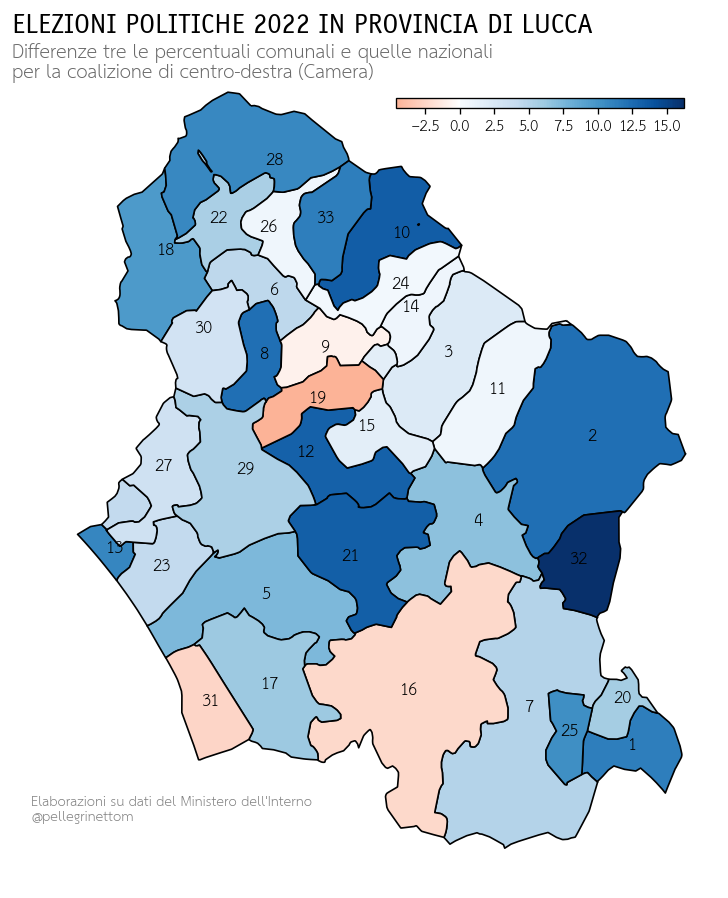

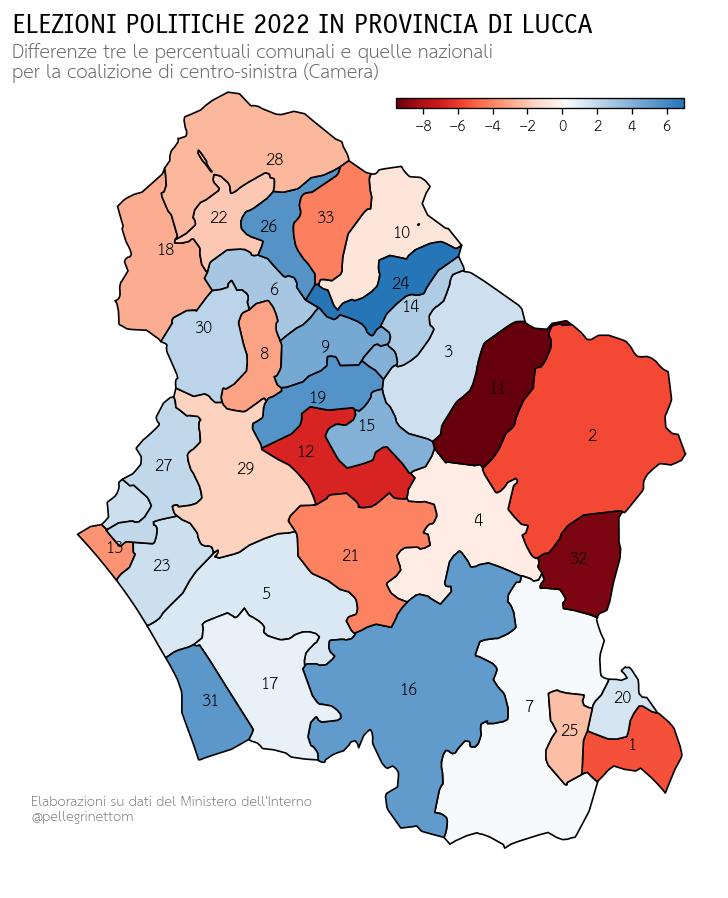

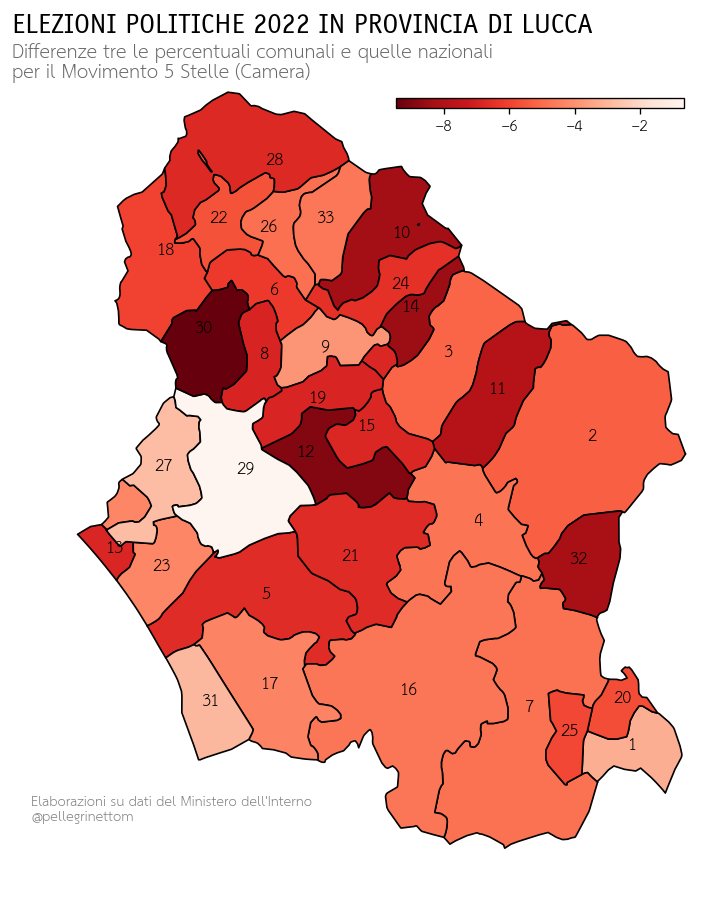

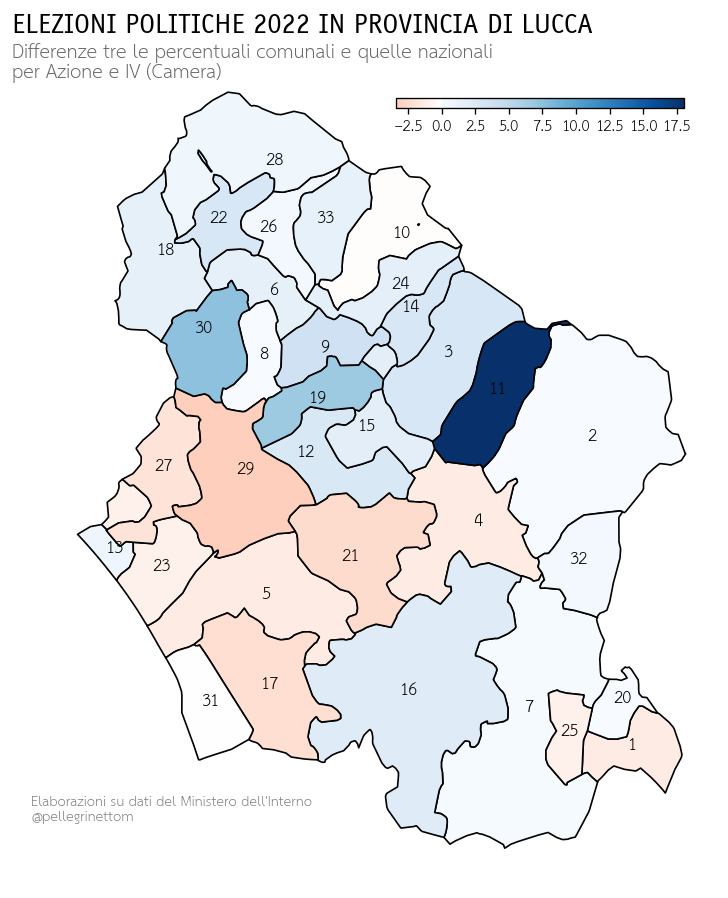

In [8]:
titles = ['per la coalizione di centro-destra', 'per la coalizione di centro-sinistra', 'per il Movimento 5 Stelle', 'per Azione e IV']
for coalizione, title in zip(['CDX_delta', 'CSX_delta', 'M5S_delta', 'AZIV_delta'], titles):

  if coalizione != 'M5S_delta':
    custom_palette = get_asymmetric_palette(df[coalizione])

    vmax = np.nanmax(df[coalizione].values)
    vmin = np.nanmin(df[coalizione].values)
    normalize = mcolors.TwoSlopeNorm(vcenter=0, vmin=vmin, vmax=vmax)

    fig, ax = plt.subplots(1, figsize=(16,9), dpi=1920/16)
    df.plot(coalizione, ax=ax, cmap = custom_palette, norm=normalize, edgecolor="black", legend = False).set_axis_off()
    for idx, row in df.iterrows():
        plt.annotate(text=row['id'], xy=row['coords'],
                    horizontalalignment='center')
    leg = ax.get_legend()
    plt.figtext(0.32,.9,'ELEZIONI POLITICHE 2022 IN PROVINCIA DI LUCCA', fontname = 'ITC Officina Sans Std', fontsize=17, ha='left')
    plt.figtext(0.32,.877,'Differenze tre le percentuali comunali e quelle nazionali',fontsize=11, ha='left', color='dimgray')
    plt.figtext(0.32,.858,'{} (Camera)'.format(title),fontsize=11, ha='left', color='dimgray')
    plt.figtext(0.33,.17,"Elaborazioni su dati del Ministero dell'Interno\n@pellegrinettom",fontsize=8, ha='left', color='grey')
    cax = fig.add_axes([0.52, 0.83, 0.15, 0.01])
    sm = plt.cm.ScalarMappable(cmap=custom_palette, norm=normalize)
    sm._A = []
    cbr = fig.colorbar(sm, cax=cax, orientation='horizontal')
    cbr.ax.tick_params(labelsize=9)
  
  else:
    # M5S was always below the national results, therefore we use a different palette
    palette = 'Reds_r'
    fig, ax = plt.subplots(1, figsize=(16,9), dpi=1920/16)
    df.plot(coalizione, ax=ax, cmap = palette, edgecolor="black", legend = False).set_axis_off()
    for idx, row in df.iterrows():
        plt.annotate(text=row['id'], xy=row['coords'],
                    horizontalalignment='center')
    leg = ax.get_legend()
    plt.figtext(0.32,.9,'ELEZIONI POLITICHE 2022 IN PROVINCIA DI LUCCA', fontname = 'ITC Officina Sans Std', fontsize=17, ha='left')
    plt.figtext(0.32,.877,'Differenze tre le percentuali comunali e quelle nazionali',fontsize=11, ha='left', color='dimgray')
    plt.figtext(0.32,.858,'{} (Camera)'.format(title),fontsize=11, ha='left', color='dimgray')
    plt.figtext(0.33,.17,"Elaborazioni su dati del Ministero dell'Interno\n@pellegrinettom",fontsize=8, ha='left', color='grey')
    vmax = np.nanmax(df[coalizione].values)
    vmin = np.nanmin(df[coalizione].values)
    cax = fig.add_axes([0.52, 0.83, 0.15, 0.01])
    sm = plt.cm.ScalarMappable(cmap=palette, norm=plt.Normalize(vmin=vmin, vmax=vmax))
    sm._A = []
    cbr = fig.colorbar(sm, cax=cax, orientation='horizontal')
    cbr.ax.tick_params(labelsize=9) 
